<a href="https://colab.research.google.com/github/Tfonteboa/Curso-ML_DIO/blob/main/DIO_LM_Modulo5_Desafio_Projeto_Detec%C3%A7%C3%A3o_Imagens_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Project was done using tutorial of YOLOV5.**

There is a dectation using a photo from YOLOv5 dataset and then an image from Coco dataset is considered.

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/3 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 65.8ms
image 2/3 /content/yolov5/data/images/e-bike-franca.jpg: 480x640 13 persons, 7 bicycles, 2 stop signs, 67.2ms
image 3/3 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 67.1ms
Speed: 0.5ms pre-process, 66.7ms inference, 42.2ms NMS per image at shape (1, 3, 6

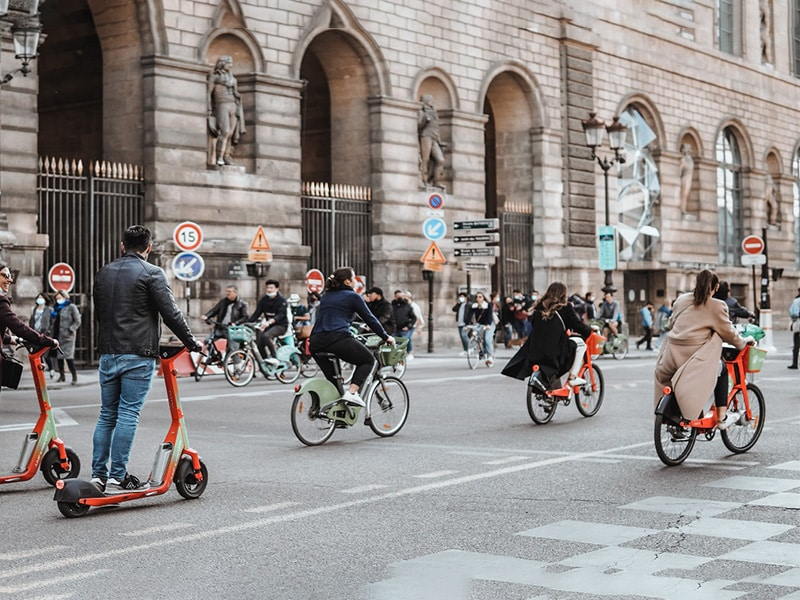

In [ ]:
#Image before classification
display.Image(filename='data/images/e-bike-franca.jpg', width=600)

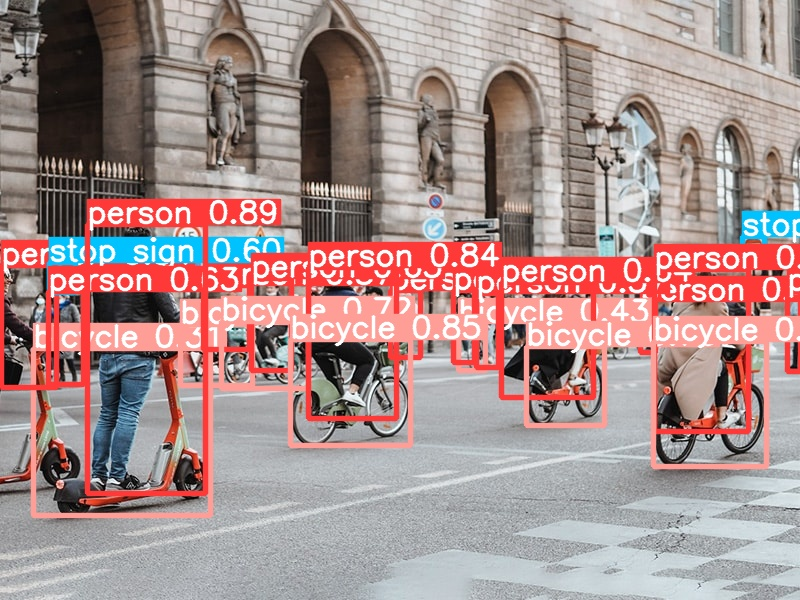

In [ ]:
#Image after classification
display.Image(filename='runs/detect/exp2/e-bike-franca.jpg', width=600)

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:03<00:00, 271MB/s]


In [ ]:
%cd ..

/content


The nexts steps was based on article to classify the use of mask or not (more details on https://medium.com/mlearning-ai/training-yolov5-custom-dataset-with-ease-e4f6272148ad)

**Step:** downloading and preparing the dataset.

Access https://www.kaggle.com/techzizou/labeled-mask-dataset-yolo-darknet and download the Labeled Mask dataset

In [ ]:
!pip install kaggle; #caso seja necessário atualizar a biblioteca no google colab

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle datasets download -d techzizou/labeled-mask-dataset-yolo-darknet

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle (1).json
100% 126M/126M [00:01<00:00, 123MB/s]
100% 126M/126M [00:01<00:00, 102MB/s]
Archive:  labeled-mask-dataset-yolo-darknet.zip
  inflating: obj/0-with-mask.jpg     
  inflating: obj/0-with-mask.txt     
  inflating: obj/0.jpg               
  inflating: obj/0.txt               
  inflating: obj/1-with-mask.jpg     
  inflating: obj/1-with-mask.txt     
  inflating: obj/10-with-mask.jpg    
  inflating: obj/10-with-mask.txt    
  inflating: obj/100-with-mask.jpg   
  inflating: obj/100-with-mask.txt   
  inflating: obj/101-with-mask.jpg   
  inflating: obj/101-with-mask.txt   
  inflating: obj/103-with-mask.jpg   
  inflating: obj/103-with-mask.txt   
  inflating: obj/104-with-mask.jpg   
  inflating: obj/104-with-mask.txt   
  inflating: obj/105-with-mask.jpg   
  inflating: obj/105-with-mask.txt   
  inflating: obj/106-with-mask.jpg   
  inflating: obj/106-with-mask.txt   
  inflating: obj/107-with-mask.jpg   
  inflating: obj/107-with-mask.txt   
  

In [ ]:
!pwd

/content


In [ ]:
import os, shutil, random
a = '/content/test/'
os.mkdir(a)

In [ ]:
import os, shutil, random

# preparing the folder structure

full_data_path = '/content/obj/'
extension_allowed = '.jpg'
split_percentage = 90

images_path = '/content/images/'
if os.path.exists(images_path):
  shutil.rmtree(images_path)
print("aqui2:", images_path)
os.mkdir(images_path)

labels_path = '/content/labels/'
if os.path.exists(labels_path):
  shutil.rmtree(labels_path)
os.mkdir(labels_path)

training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'

os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]
            files.append(strip)

random.shuffle(files)

size = len(files)

split = int(split_percentage * size / 100)

print("copying training data")
for i in range(split):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, training_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, training_labels_path)

print("copying validation data")
for i in range(split, size):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path)

print("finished")

aqui2: /content/images/
copying training data
copying validation data
finished


**preparing the training configuration file**
The next step is creating a text file called dataset.yaml

In [ ]:
f = open("dataset.yaml", "a")

f.write("train: ../content/images/training/\n")
f.write("val: ../content/images/validation/\n")
f.write("nc: 2\n")
f.write("names: ['with mask', 'without mask']\n")
f.close()

**Running the train**
Now we are all set, it is time to actually run the train:

In [ ]:
!pwd
# it's necessary to create content/images and content/labels in yolov5 folder

/content/yolov5


In [ ]:
#%cd yolov5
!python train.py --img 640 --batch 16 --epochs 3 --data ../dataset.yaml --weights yolov5s.pt

2023-11-15 20:43:42.181248: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 20:43:42.181305: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 20:43:42.181346: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, proje

**Results of training/validation**

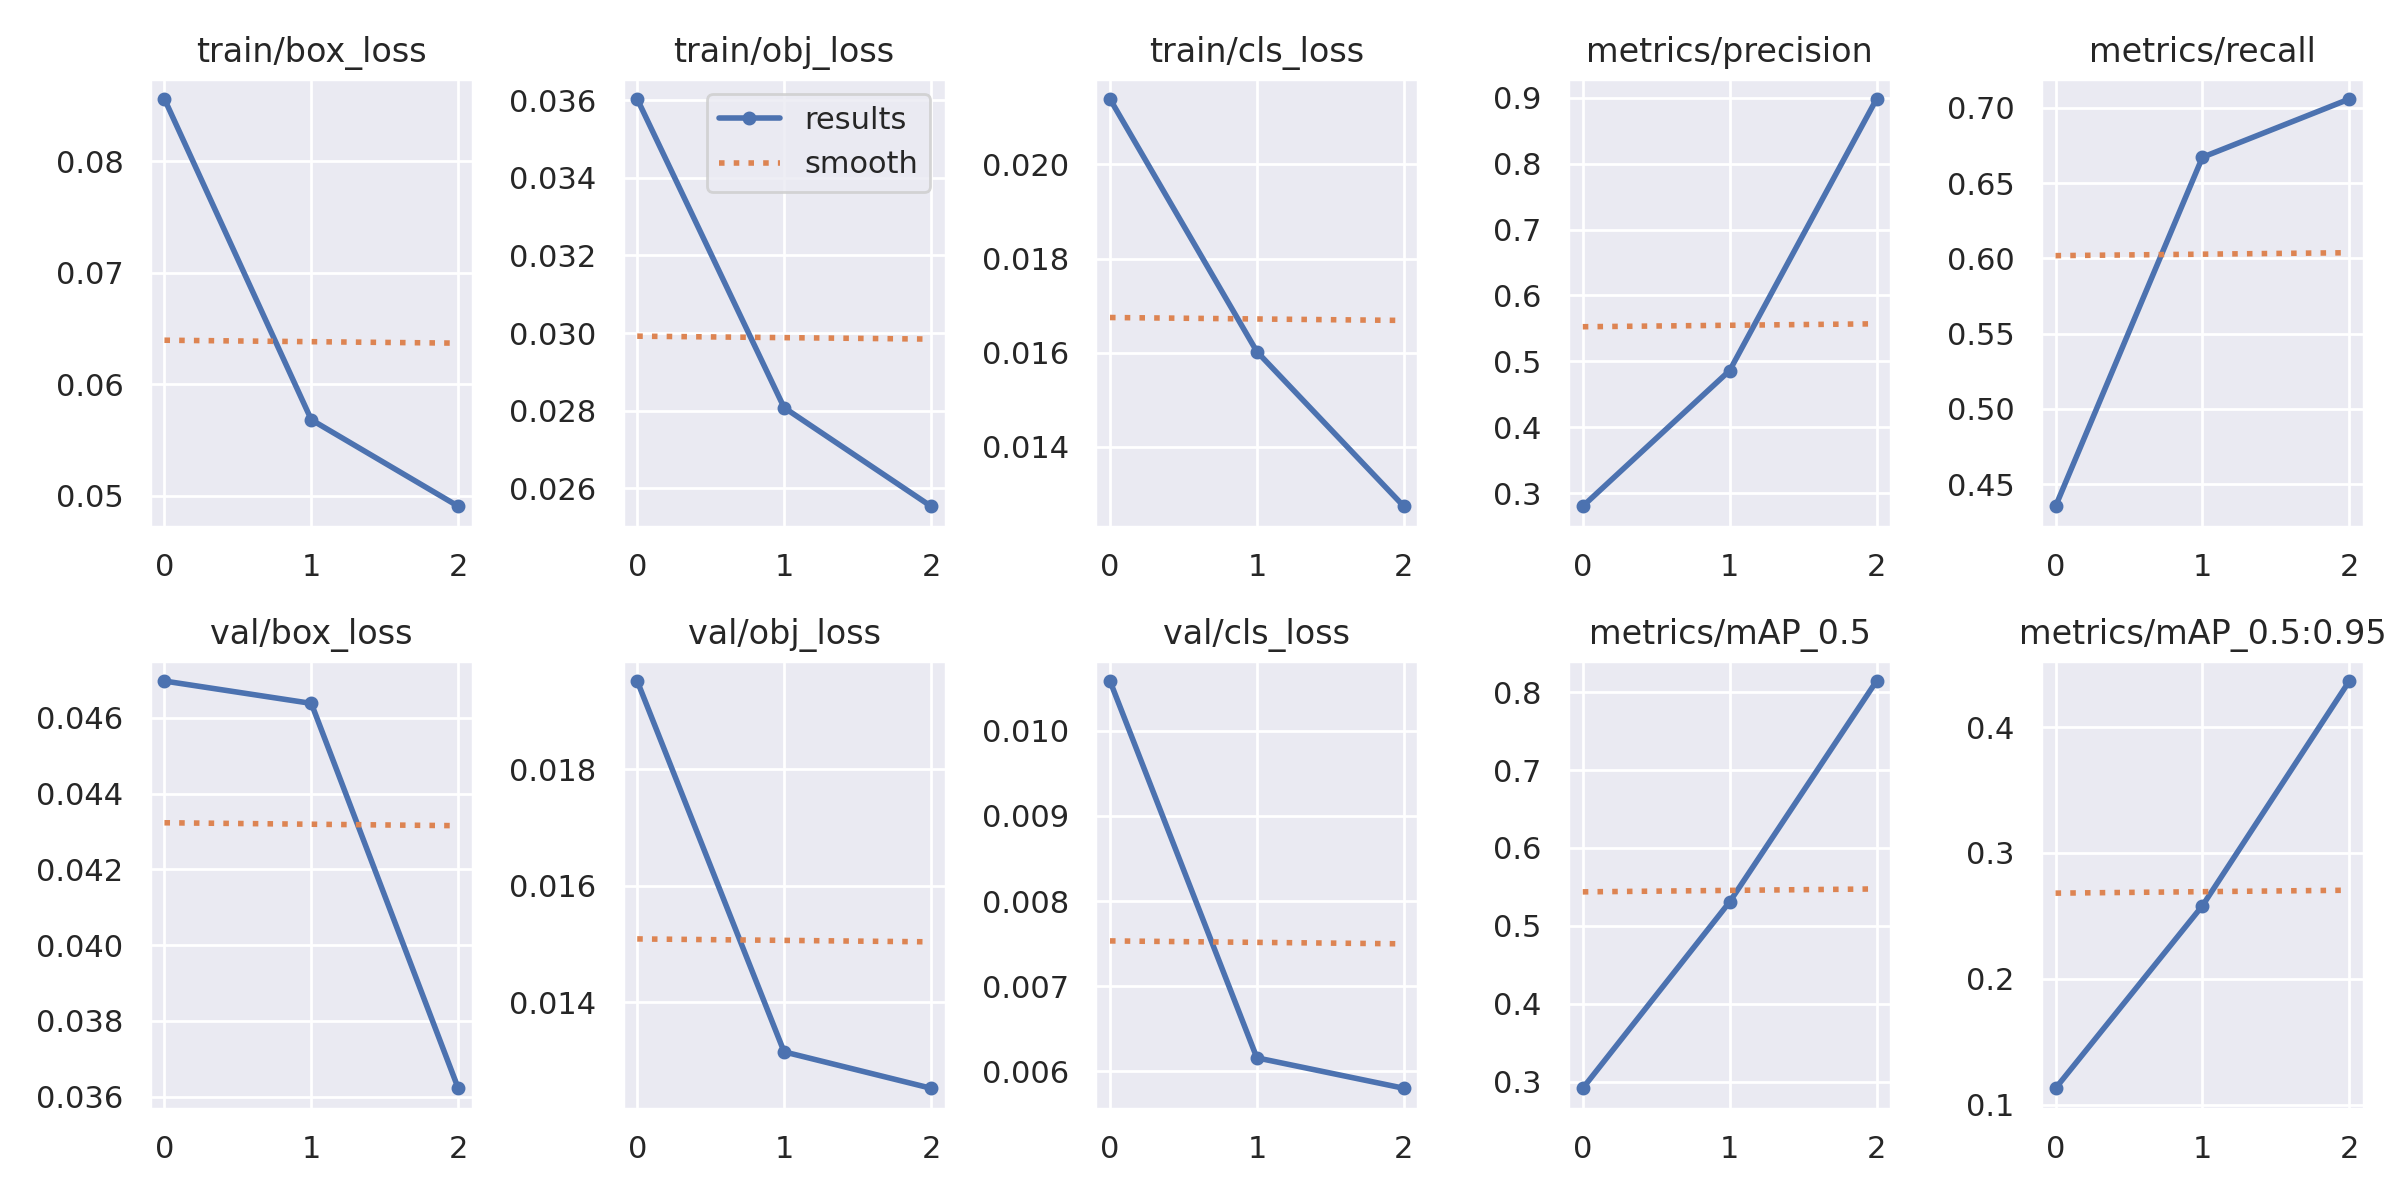

In [ ]:
display.Image(filename='runs/train/exp6/results.png', width=600)

**Using the trained model**

In [ ]:
!python detect.py --weights runs/train/exp6/weights/best.pt --img 640 --conf 0.4 --source data/images/test_mascara.jpg

detect: weights=['runs/train/exp6/weights/best.pt'], source=data/images/test_mascara.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/data/images/test_mascara.jpg: 448x640 6 with masks, 49.8ms
Speed: 0.5ms pre-process, 49.8ms inference, 85.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


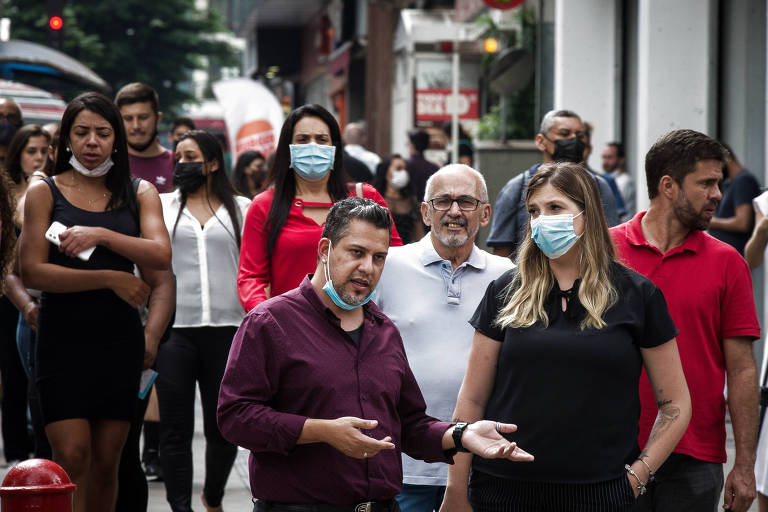

In [ ]:
#Image before classification
display.Image(filename='data/images/test_mascara.jpg', width=600)

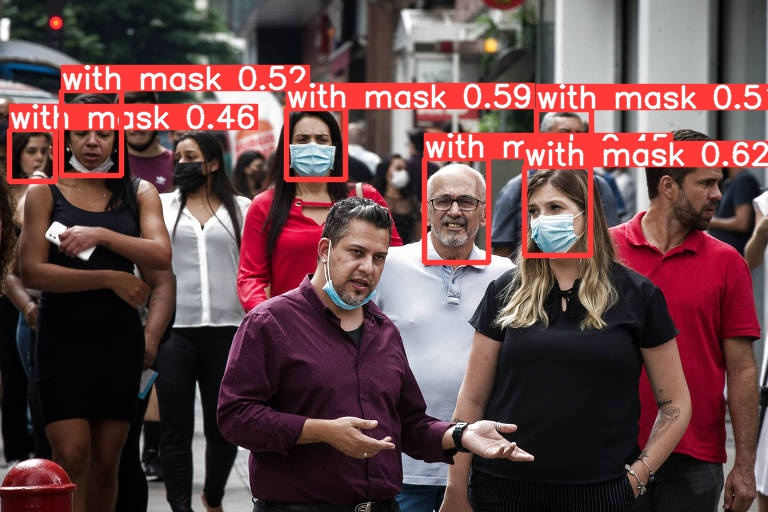

In [ ]:
#Image after classification
display.Image(filename='runs/detect/exp7/test_mascara.jpg', width=600)

In [ ]:
# training the dataset
!python train.py --data coco.yaml --epochs 3 --weights yolov5s.pt --cfg yolov5n.yaml  --batch-size 128
                                                                        #yolov5s                    64
                                                                        #yolov5m                    40
                                                                        #yolov5l                    24
                                                                        #yolov5x                    16
# training an image from dataset
#!python train.py --img 139 --data coco.yaml --epochs 3 --weights yolov5s.pt --cfg yolov5n.yaml  --batch-size 128
                                                                                  #yolov5s                    64
                                                                                  #yolov5m                    40
                                                                                  #yolov5l                    24
                                                                                  #yolov5x                    16

2023-11-15 19:23:34.517851: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 19:23:34.517916: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 19:23:34.517959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=yolov5n.yaml, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=128, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8